<a href="https://colab.research.google.com/github/yokesh412/unsupervised-project/blob/main/Copy_of_Customer_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [3]:
dataset =pd.read_csv('/content/drive/MyDrive/Online-Retail.csv')

**DATA CLEANING**

In [4]:
#visualizing dataframe
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
dataset.loc[(dataset.UnitPrice<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [7]:
dataset.loc[(dataset.Quantity<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


Obseravtion:

We have minimum Quantities as a negative value. On further analysis, we can see from InvoiceNo every entry starting from 'C'. These are cancellation orders so, the quantity is returned to the store.

Number of cancellations compared to total entries is small so we can ignore these cancellation entries.

In [8]:
#Removing the negative values from UnitPrice and Quantity
dataset = dataset[dataset.Quantity > 0]
dataset = dataset[dataset.UnitPrice > 0]

In [9]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530104 non-null  object 
 1   StockCode    530104 non-null  object 
 2   Description  530104 non-null  object 
 3   Quantity     530104 non-null  int64  
 4   InvoiceDate  530104 non-null  object 
 5   UnitPrice    530104 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      530104 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.4+ MB


In [11]:
print(dataset.shape)

(530104, 8)


In [12]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

CustomerID 0.2494  % missing values


Observation:

We have lots of null values in CustomerID column. These entries are not much of use to analyze data for customers. If we try to fill these values with any number it might adversely affect our results. Since we have very large data set we can ignore these entries and remove them from the dataset.


In [13]:
#Removing the Null values from the data.
dataset = dataset[pd.notnull(dataset['CustomerID'])]
dataset = dataset[pd.notnull(dataset['Description'])]

In [14]:
#The proportion of Customers- country wise
dataset.Country.value_counts(normalize=True)

United Kingdom          0.890513
Germany                 0.022720
France                  0.020963
EIRE                    0.018186
Spain                   0.006243
Netherlands             0.005929
Belgium                 0.005105
Switzerland             0.004627
Portugal                0.003674
Australia               0.002971
Norway                  0.002692
Italy                   0.001905
Channel Islands         0.001880
Finland                 0.001722
Cyprus                  0.001543
Sweden                  0.001133
Austria                 0.001000
Denmark                 0.000955
Poland                  0.000829
Japan                   0.000807
Israel                  0.000623
Unspecified             0.000613
Singapore               0.000558
Iceland                 0.000457
USA                     0.000450
Canada                  0.000380
Greece                  0.000364
Malta                   0.000281
United Arab Emirates    0.000171
European Community      0.000151
RSA       

Observation:

 United Kingdom customers, which contains most of our customer’s historical data(90% of customer)

In [16]:
#taking only UK customers
dataset = dataset[dataset.Country == 'United Kingdom']

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354321 non-null  object 
 1   StockCode    354321 non-null  object 
 2   Description  354321 non-null  object 
 3   Quantity     354321 non-null  int64  
 4   InvoiceDate  354321 non-null  object 
 5   UnitPrice    354321 non-null  float64
 6   CustomerID   354321 non-null  float64
 7   Country      354321 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [18]:
!pip install feature-engine

In [19]:
import datetime as dt
import feature_engine

In [20]:
#Transforming InvoiceDate column
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['InvoiceYearMonth'] = dataset['InvoiceDate'].map(lambda date: 100*date.year+ date.month)
dataset['Date'] = dataset['InvoiceDate'].dt.strftime('%Y-%m')

In [21]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12


**Exploratory data analysis**

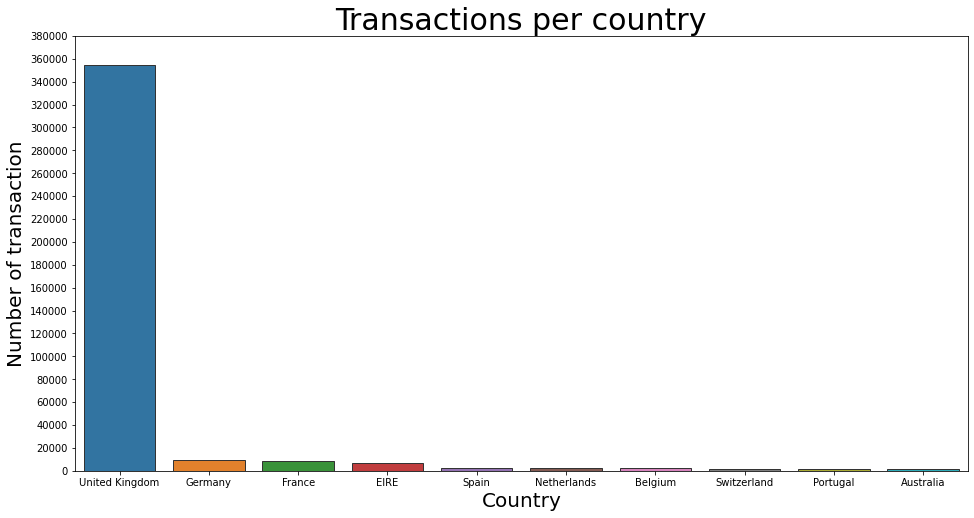

In [15]:
# plot sales for top 10 counties
country_data = dataset.groupby('Country').count().reset_index()
country_data.sort_values('InvoiceNo', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(data=country_data[0:10], x='Country', y='InvoiceNo', ax=axes, linewidth=1, edgecolor='0.2')
axes.set_yticks(range(0,400000,20000))
axes.set_xlabel('Country', size=20)
axes.set_ylabel('Number of transaction', size=20)
axes.set_title('Transactions per country', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

In [22]:
import plotly.offline as pyoff
import plotly.graph_objs as go

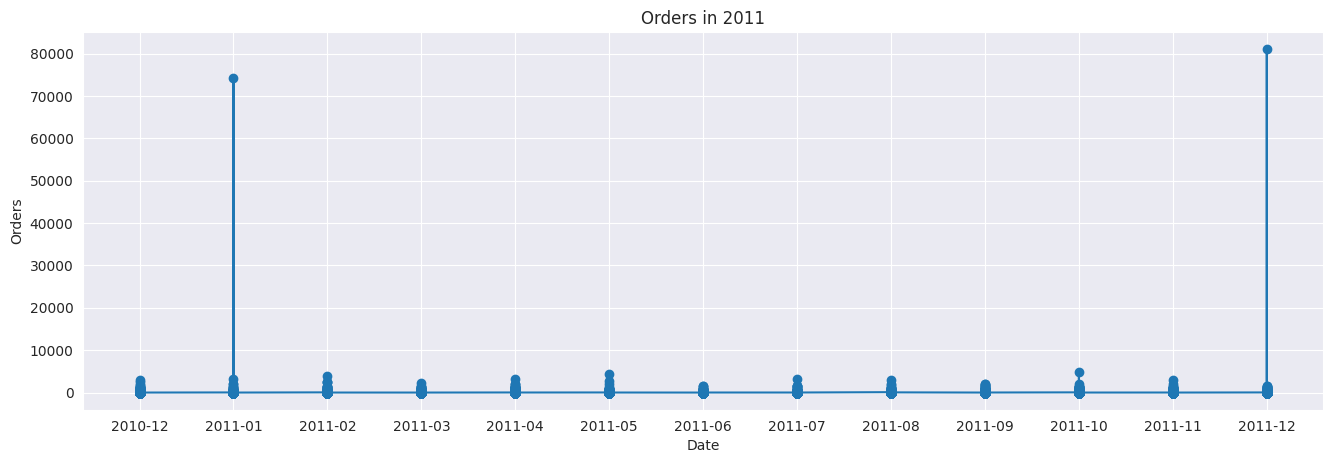

In [23]:
#Function to plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Orders', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()
#plotting
plot_df(dataset, x=dataset.Date, y=dataset.Quantity,title='Orders in 2011')

In [24]:
dataset['Revenue'] = dataset['Quantity']*dataset['UnitPrice']

In [25]:
dataset_revenue = dataset.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()

In [26]:
dataset_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,498661.850
1,201101,442190.060
2,201102,355655.630
3,201103,467198.590
4,201104,409559.141


In [27]:
plot_data = [
    go.Scatter(
        x=dataset_revenue['InvoiceYearMonth'],
        y=dataset_revenue['Revenue'],
        mode='lines+markers'
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [28]:
dataset.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Date,Revenue
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,201112,2011-12,23.4
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,201112,2011-12,23.6
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,201112,2011-12,30.0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,201112,2011-12,214.8
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,201112,2011-12,70.8


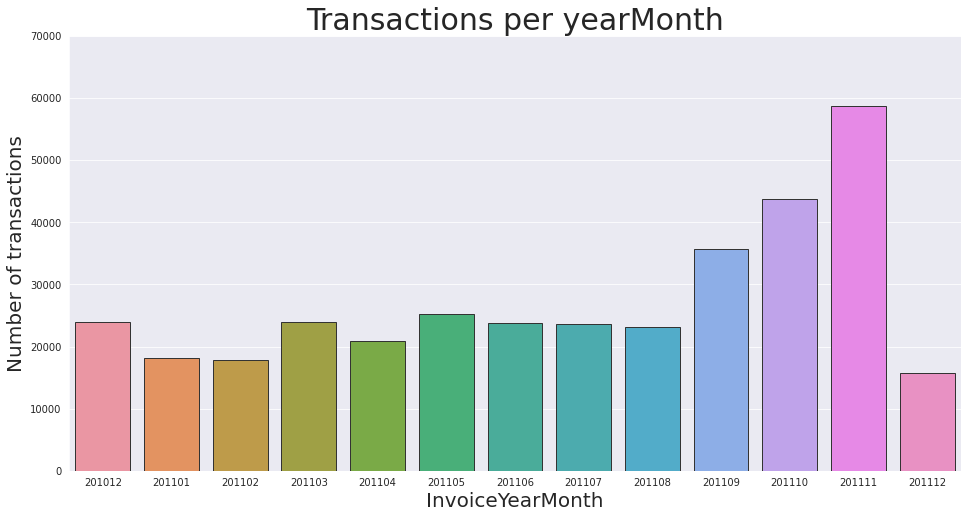

In [29]:
# plot transaction for year and month
month_data = dataset.groupby('InvoiceYearMonth').count().reset_index()
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(data=month_data, x='InvoiceYearMonth', y='InvoiceNo', ax=axes, linewidth=1, edgecolor='0.2')
axes.set_yticks(range(0,80000,10000))
axes.set_xlabel('InvoiceYearMonth', size=20)
axes.set_ylabel('Number of transactions', size=20)
axes.set_title('Transactions per yearMonth', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

**RFM Segmentation**:

RFM stands for Recency, Frequency, and Monetary. RFM analysis is a commonly used technique to generate and assign a score to each customer based on how recent their last transaction was (Recency), how many transactions they have made in the last year (Frequency), and what the monetary value of their transaction was (Monetary).

In [30]:
#last INvoice date is used to calculate recency
last_invoice = dt.date(2011,12,9) 
dataset['Date'] = pd.DatetimeIndex(dataset.InvoiceDate).date

In [31]:
#calculating Recency
dataset_recency = dataset.groupby(by='CustomerID',
						as_index=False)['Date'].max()
dataset_recency.columns = ['CustomerID', 'LastPurchaseDate']
dataset_recency['Recency'] = dataset_recency['LastPurchaseDate'].apply(
	lambda x: (last_invoice - x).days)
dataset_recency.head()


,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [32]:
#Calculating Frequency and Monetary value for each customer
fm_table = dataset.groupby('CustomerID').agg({'InvoiceNo' : lambda x: len(x),'Revenue': lambda x: x.sum()})
fm_table.rename(columns = {'InvoiceNo':'frequency','Revenue':'Monetary'},inplace=True)

In [33]:
fm_table.head()

,frequency,Monetary
CustomerID,,
12346.0,1,77183.60
12747.0,103,4196.01
12748.0,4595,33719.73
12749.0,199,4090.88
12820.0,59,942.34


In [34]:
#merging recency frequency monetary table
RFM_table = dataset_recency.merge(fm_table,left_on='CustomerID',right_on='CustomerID')

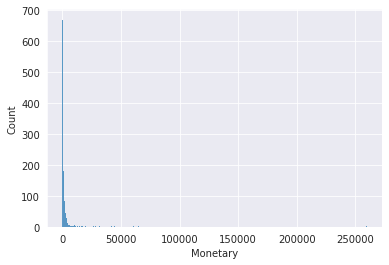

In [35]:
# plot Monetary value 
sns.histplot(RFM_table['Monetary'])

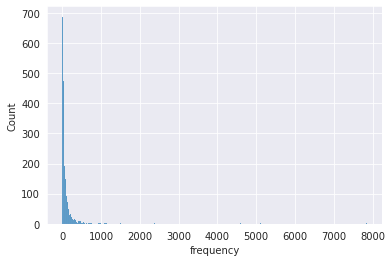

In [36]:
# plot Frequency
sns.histplot(RFM_table['frequency'])

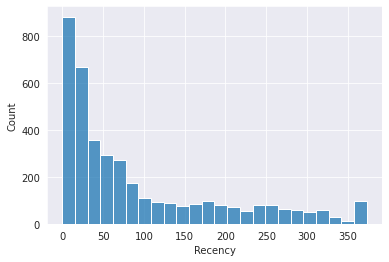

In [37]:
# plot Recency
sns.histplot(RFM_table['Recency'])

Observation:

From above histogram ,we can see that values are highly skewed.we have to apply log transformation to normalise the value.

**FEATURE ENGINEERING:**

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
#applying log transformation 
RFM_table['Recency'] = np.log(RFM_table['Recency']+1) 
RFM_table['frequency'] = np.log(RFM_table['frequency']+1)
RFM_table['Monetary'] = np.log(RFM_table['Monetary']+1)

In [40]:
RFM_table.head(20)

,CustomerID,LastPurchaseDate,Recency,frequency,Monetary
0,12346.0,2011-01-18,5.786897,0.693147,11.253955
1,12747.0,2011-12-07,1.098612,4.644391,8.342128
2,12748.0,2011-12-09,0.000000,8.432942,10.425868
3,12749.0,2011-12-06,1.386294,5.298317,8.316760
4,12820.0,2011-12-06,1.386294,4.094345,6.849427
5,12821.0,2011-05-09,5.370638,1.945910,4.540312
6,12822.0,2011-09-30,4.262680,3.850148,6.856336
7,12823.0,2011-09-26,4.317488,1.791759,7.473353
8,12824.0,2011-10-11,4.094345,3.258097,5.986753
9,12826.0,2011-12-07,1.098612,4.521789,7.296901


In [41]:
RFM_table.isnull().sum()

CustomerID          0
LastPurchaseDate    0
Recency             0
frequency           0
Monetary            0
dtype: int64

Text(0.5, 0.98, 'Data distribution after log transform')

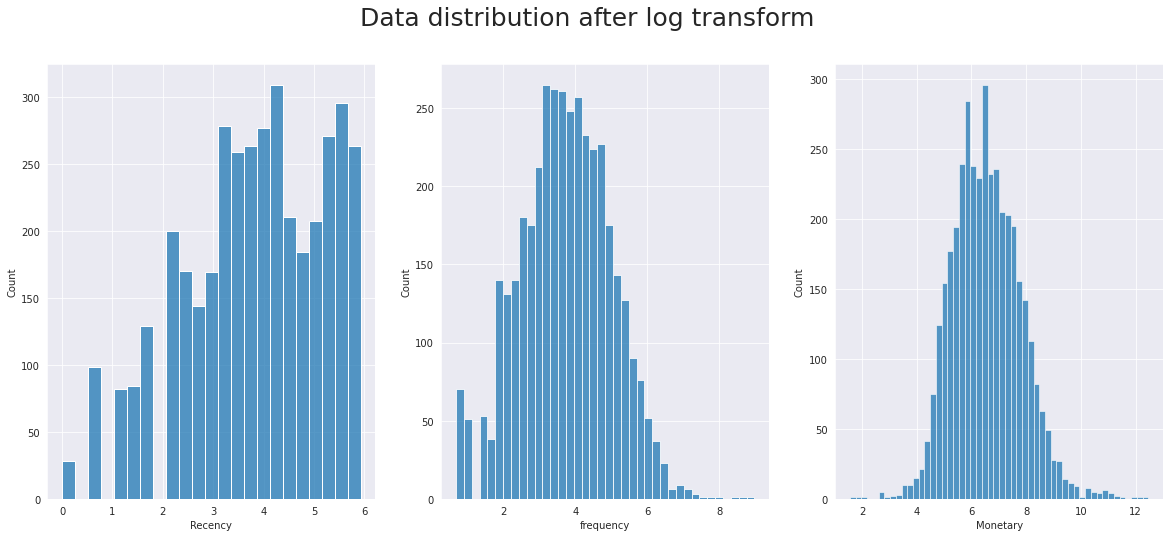

In [42]:
# plot the data distribution after log transform
fig, axis = plt.subplots(nrows=1, ncols= 3, figsize=(20,8))
sns.histplot(RFM_table['Recency'], ax=axis[0])
sns.histplot(RFM_table['frequency'], ax=axis[1])
sns.histplot(RFM_table['Monetary'], ax=axis[2])
fig.suptitle("Data distribution after log transform", size=25)

We have removed skewness from data now we can start with segmentation.

In [43]:
RFM_table = RFM_table.drop(['LastPurchaseDate'],axis=1)

Let's see how these data points look like in 3d space.

In [44]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'Data Visualization')

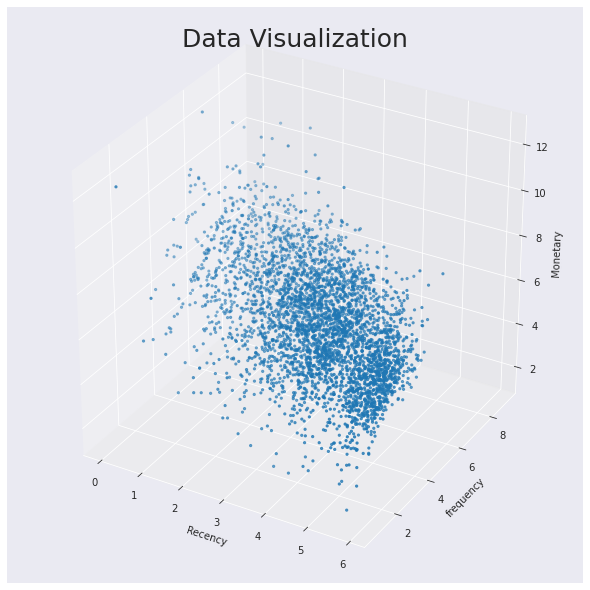

In [45]:
# plot data points in 3D space
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
x = RFM_table['Recency']
y = RFM_table['frequency']
z = RFM_table['Monetary']
ax.scatter(x, y, z, marker='.')
ax.set_xlabel('Recency')
ax.set_ylabel('frequency')
ax.set_zlabel('Monetary')
plt.title("Data Visualization", size=25)

**K-Means Clustering**

Our dataset is large so Hierarchical clustering is not well suited for analysis. So, we will use the K-Means clustering algorithm, which is easy to apply fast, and accurate for clustering problems.

K-Means algorithm requires number of clusters as a parameter to group data points in clusters. To find the number of clusters we can use the Elbow method or Silhouette analysis.

In [46]:
data = RFM_table.drop(['CustomerID'],axis=1)

**Elbow Method**

In [47]:
from sklearn.cluster import KMeans

In [48]:
# calculate Elbow method scores
sse = {} # sum of squared errors
# use cluster from range 1 to 20
for k in range(1, 21):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit KMeans on the dataset
    kmeans.fit(data)
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_ # Used for Plotting the elbow plot

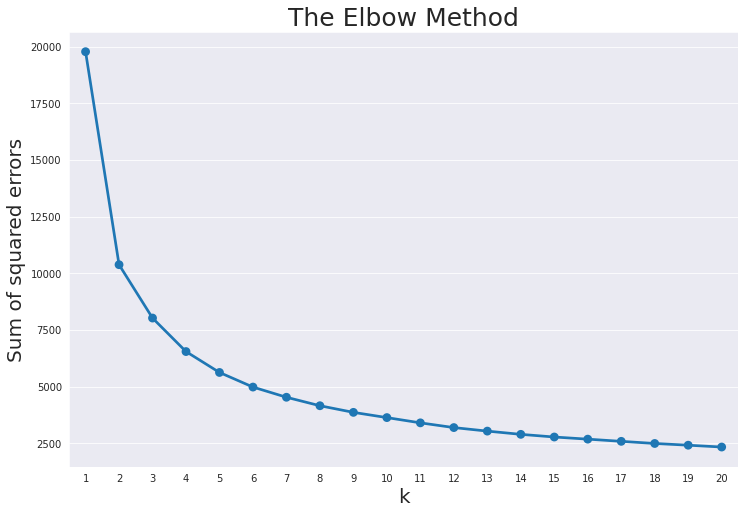

In [49]:
# the elbow plot
plt.figure(figsize=(12,8))
plt.title('The Elbow Method', size=25)
plt.xlabel('k', size=20); 
plt.ylabel('Sum of squared errors', size=20)
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

We can see that error is decreasing as K increases. For values of k at 4 or 5 slope of the curve is decreasing very fast this means errors do not decrease much faster as the increase in number of clusters.

These clusters represent customer segmentation and to utilize these segmentations company needs to invent new policies for each segment. So, increase in customer segment cause extra cost for compy for implementation of new policies so very large value of k is not desirable.

We can keep value of k=4.

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.3988192218429606
For n_clusters = 3 The average silhouette_score is : 0.30498711577654153
For n_clusters = 4 The average silhouette_score is : 0.3102602144700939
For n_clusters = 5 The average silhouette_score is : 0.27749226344226463
For n_clusters = 6 The average silhouette_score is : 0.27662138203593933
For n_clusters = 7 The average silhouette_score is : 0.2621107872337536
For n_clusters = 8 The average silhouette_score is : 0.2611236716330084


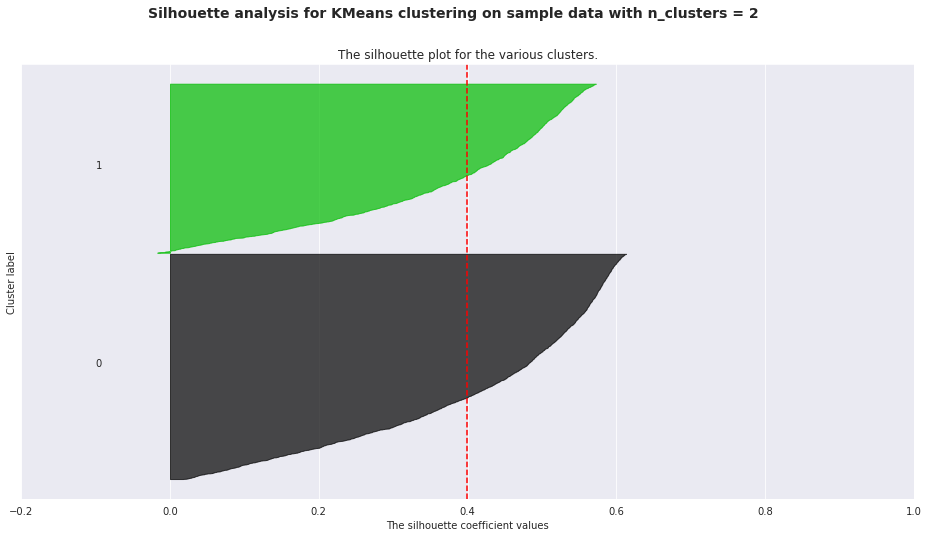

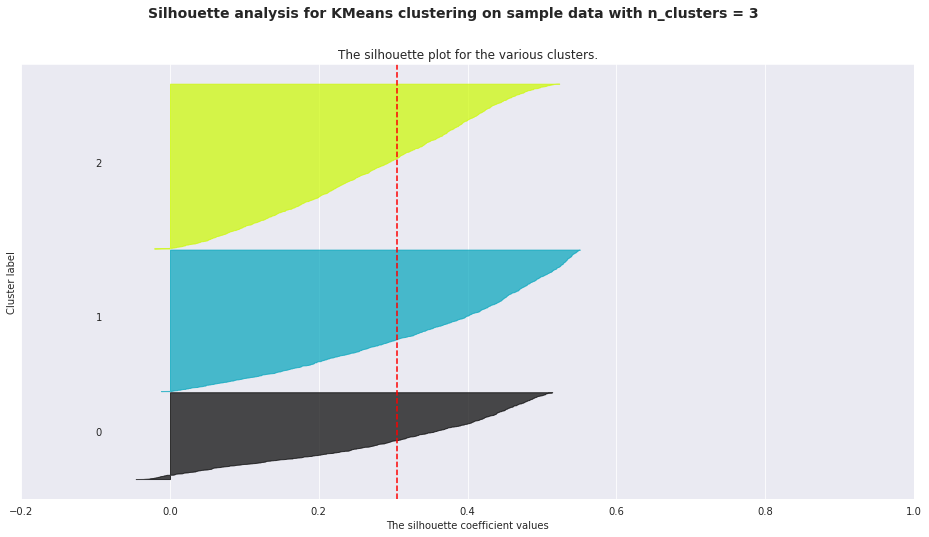

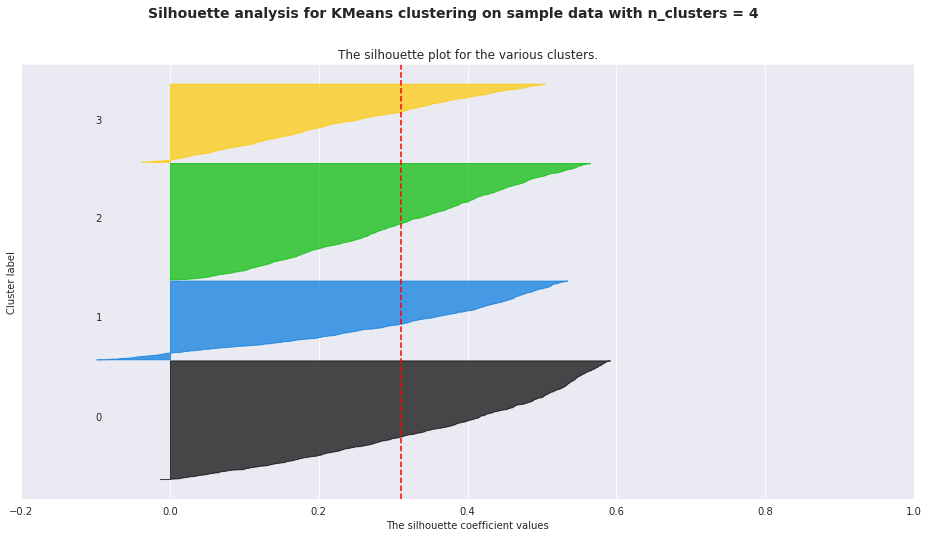

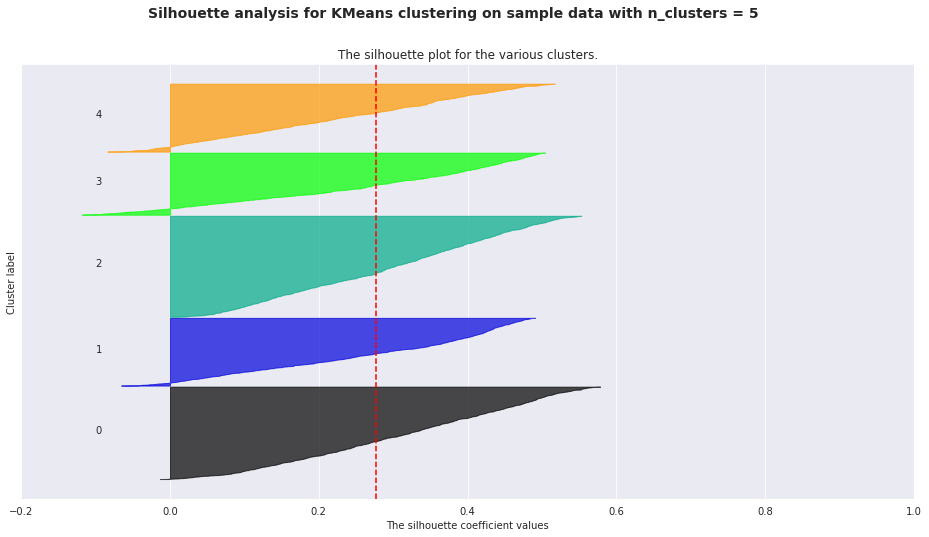

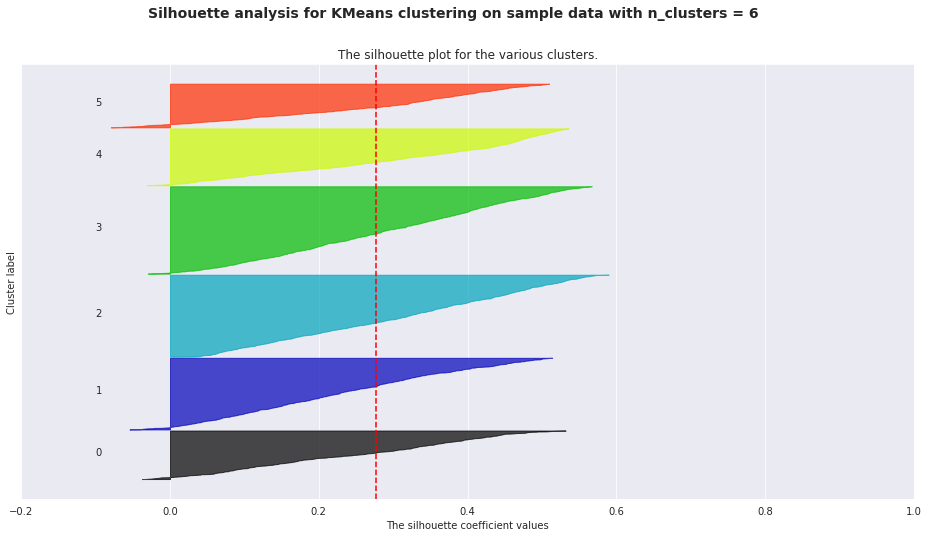

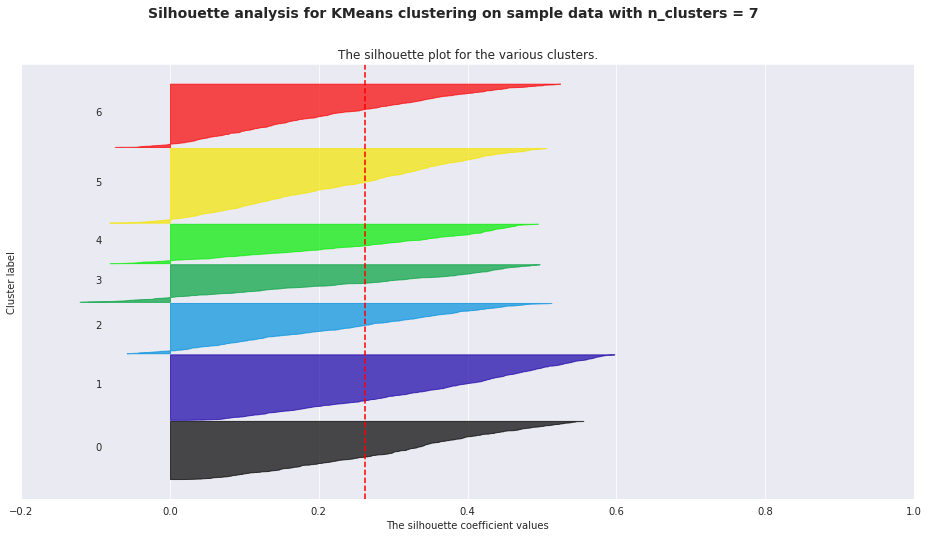

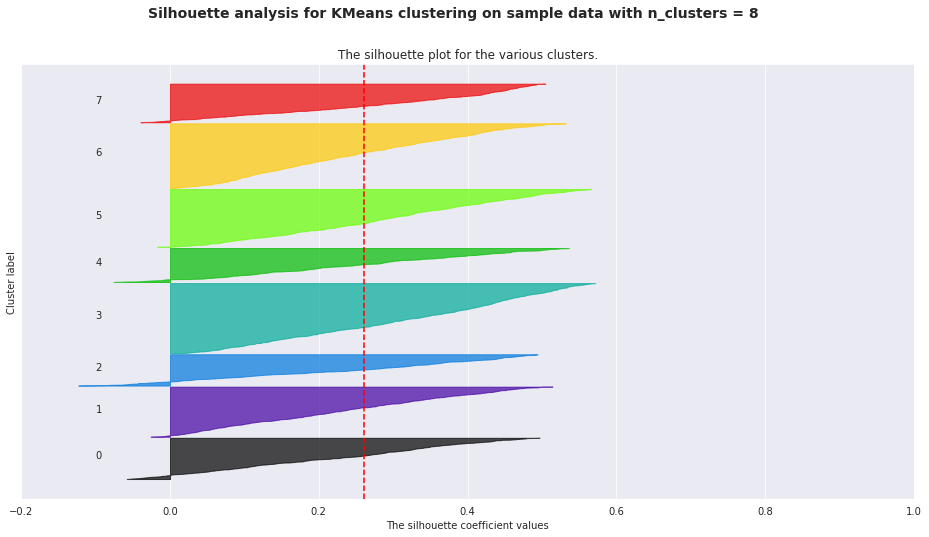

In [51]:
# make a list of clusters to check
clusters_list = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in clusters_list:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    fig, axis = plt.subplots(figsize=(16,8))
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        axis.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
         # Label the silhouette plots with their cluster numbers at the middle
        axis.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axis.set_title("The silhouette plot for the various clusters.")
    axis.set_xlabel("The silhouette coefficient values")
    axis.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axis.axvline(x=silhouette_avg, color="red", linestyle="--")

    axis.set_yticks([])  # Clear the yaxis labels / ticks
    axis.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
   
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

K=4 have optimal score. Let's visualize these clusters.

In [52]:
clusterer = KMeans(n_clusters=4, random_state=1)
cluster_labels = clusterer.fit_predict(data)

In [53]:
print(cluster_labels)

[2 1 1 ... 3 1 2]


Text(0.5, 0.92, 'Data Visualization')

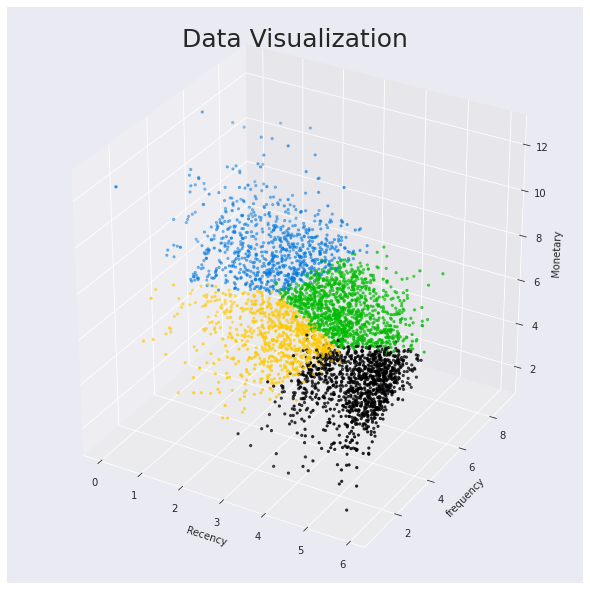

In [54]:
# plot data points in 3D space
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
x = data['Recency']
y = data['frequency']
z = data['Monetary']
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax.scatter(x, y, z, c=colors, marker='.')
ax.set_xlabel('Recency')
ax.set_ylabel('frequency')
ax.set_zlabel('Monetary')
plt.title("Data Visualization", size=25)

In [55]:
# add cluster label to each data point
RFM_table['Cluster'] = cluster_labels
RFM_table.head()

,CustomerID,Recency,frequency,Monetary,Cluster
0,12346.0,5.786897,0.693147,11.253955,2
1,12747.0,1.098612,4.644391,8.342128,1
2,12748.0,0.000000,8.432942,10.425868,1
3,12749.0,1.386294,5.298317,8.316760,1
4,12820.0,1.386294,4.094345,6.849427,1


In [58]:
customer_seg = RFM_table
customer_seg.head()

,CustomerID,Recency,frequency,Monetary,Cluster
0,12346.0,5.786897,0.693147,11.253955,2
1,12747.0,1.098612,4.644391,8.342128,1
2,12748.0,0.000000,8.432942,10.425868,1
3,12749.0,1.386294,5.298317,8.316760,1
4,12820.0,1.386294,4.094345,6.849427,1


In [60]:
# calculate mean of each feature for clusters
cluster_data = customer_seg.groupby('Cluster').mean()
cluster_data

,CustomerID,Recency,frequency,Monetary
Cluster,,,,
0,15572.312816,5.159727,2.545859,5.459353
1,15482.085133,2.016106,5.209388,8.068147
2,15546.621459,4.158611,4.292399,7.059033
3,15649.994885,2.992592,3.155894,5.898667


In [61]:
# drop unnecessary column
cluster_data.drop(columns=['CustomerID'], inplace=True)

In [62]:
# We have log-transformed the features now to get more intuition take exponential of each feature
cluster_data = cluster_data.applymap(np.exp)
cluster_data = cluster_data.applymap(int)
cluster_data

,Recency,frequency,Monetary
Cluster,,,
0,174,12,234
1,7,182,3191
2,63,73,1163
3,19,23,364


**Conclusion:**

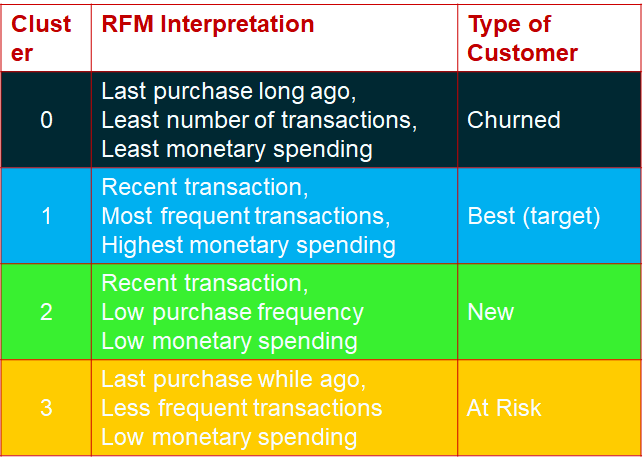